In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, accuracy_score,f1_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import Pipeline
from nltk.corpus import names
from collections import defaultdict
import re

%matplotlib inline

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
data = pd.Series(newsgroups.data)
df = pd.DataFrame(data)
df.columns = ['text'] + df.columns.tolist()[1:]
df['target'] = pd.Series(newsgroups.target)
df.head()

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4


In [3]:
print('shape of dataframe: ', df.shape)
print('number of target variables: ',df.target.nunique())
print('null target variables: ', df.target.isna().any())
print('null text: ',df.text.isna().any())

shape of dataframe:  (18846, 2)
number of target variables:  20
null target variables:  False
null text:  False


In [4]:
df.text

0        \n\nI am sure some bashers of Pens fans are pr...
1        My brother is in the market for a high-perform...
2        \n\n\n\n\tFinally you said what you dream abou...
3        \nThink!\n\nIt's the SCSI card doing the DMA t...
4        1)    I have an old Jasmine drive which I cann...
                               ...                        
18841    DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...
18842    \nNot in isolated ground recepticles (usually ...
18843    I just installed a DX2-66 CPU in a clone mothe...
18844    \nWouldn't this require a hyper-sphere.  In 3-...
18845    After a tip from Gary Crum (crum@fcom.cc.utah....
Name: text, Length: 18846, dtype: object

In [5]:
df1 = df[df.text != ' ']
df1

,text,target
0,\n\nI am sure some bashers of Pens fans are pr...,10
1,My brother is in the market for a high-perform...,3
2,\n\n\n\n\tFinally you said what you dream abou...,17
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3
4,1) I have an old Jasmine drive which I cann...,4
...,...,...
18841,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13
18842,\nNot in isolated ground recepticles (usually ...,12
18843,I just installed a DX2-66 CPU in a clone mothe...,3
18844,\nWouldn't this require a hyper-sphere. In 3-...,1


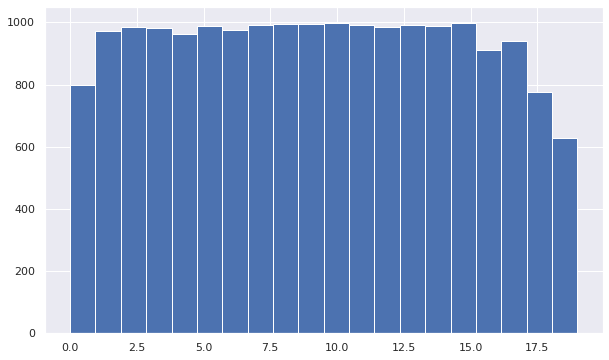

In [6]:
sns.set(rc={'figure.figsize':(10,6)})
df['target'].hist(bins=df.target.nunique())

In [7]:
#remove emails
df['text'] = df['text'].apply(lambda row: re.sub(r"\S*@\S*\s?","",row))

#remove extra spaces
df['text'] = df['text'].apply(lambda row: re.sub(r"\s+"," ",row))

# #remove single quote marks
df['text'] = df['text'].apply(lambda row: re.sub(r"\'","",row))

#make all text lower case
df['text'] = df['text'].str.lower()

#remove empty rows
# df['text'] = df[df.text != ' ']

In [8]:
df.isna().any()

text      False
target    False
dtype: bool

In [9]:
#instatiate tokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

#tokenize test
df['tokenized_text'] = df.apply(lambda row: tokenizer.tokenize(row['text']),axis=1)

#define stop words
stop_words=set(stopwords.words("english"))

#remove stop words
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [item for item in x if item not in stop_words])

#instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

#lemmatize text
df['lemmatized'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
df.lemmatized = df.lemmatized.apply(lambda x: " ".join(x) )

df.sample(5)

,text,target,tokenized_text,lemmatized
17924,there is a library of map projections in: cha...,1,"[library, map, projections, charon, er, usgs, ...",library map projection charon er usgs gov
7724,: : >its quite possible that a buyer and selle...,18,"[quite, possible, buyer, seller, trust, third,...",quite possible buyer seller trust third party ...
5116,theres another point to be made. those who ha...,19,"[theres, another, point, made, inside, burning...",there another point made inside burning house ...
5377,chicago from what i have read is projected to ...,2,"[chicago, read, projected, run, 4m, 386, highe...",chicago read projected run 4m 386 higher defin...
2366,liberals and supporters of clinton say that c...,16,"[liberals, supporters, clinton, say, costs, ma...",liberal supporter clinton say cost made action...


In [10]:
df.tokenized_text.isna().any()

False

In [11]:
#train test validation split

X,y = df.lemmatized,df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [12]:
accuracy = make_scorer(accuracy_score, average='macro')
precision = make_scorer(precision_score, average='macro')
recall =  make_scorer(recall_score, average='macro')
f1 = make_scorer(f1_score, average='macro')
scoring={'accuracy':accuracy,'precision':precision,'recall':recall,'f1':f1}

In [13]:
#pipeline for logistic regression

pipe_logreg = Pipeline([
#     ('vect', CountVectorizer()),
     ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])
parameters_logreg = {
    'tfidf__min_df': [0.001,0.005,0.01],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__max_features': [None, 5000, 10000, 50000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    "clf__C": [0.01, 0.1, 1,10],
    "clf__class_weight": ['balanced'],
    "clf__solver": ['newton-cg', 'lbfgs', 'sag'],
#     "clf__l1_ratio":[0,0.2,0.4,0.6,0.8,1],
    "clf__multi_class":['multinomial']
}

gs_logreg = GridSearchCV(estimator=pipe_logreg,
            param_grid=parameters_logreg,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)




In [14]:
# Fit using grid search
best_model = gs_logreg.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_logreg.best_score_)

# Best params
print('\nBest params:\n', gs_logreg.best_params_)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 44.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 61.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 85.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 93.1min finished


Best accuracy: 0.708

Best params:
 {'clf__C': 1, 'clf__class_weight': 'balanced', 'clf__multi_class': 'multinomial', 'clf__solver': 'newton-cg', 'tfidf__max_df': 0.5, 'tfidf__max_features': None, 'tfidf__min_df': 0.001, 'tfidf__ngram_range': (1, 1)}


In [15]:
pipe_logreg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__analyzer', 'tfidf__binary', 'tfidf__decode_error', 'tfidf__dtype', 'tfidf__encoding', 'tfidf__input', 'tfidf__lowercase', 'tfidf__max_df', 'tfidf__max_features', 'tfidf__min_df', 'tfidf__ngram_range', 'tfidf__norm', 'tfidf__preprocessor', 'tfidf__smooth_idf', 'tfidf__stop_words', 'tfidf__strip_accents', 'tfidf__sublinear_tf', 'tfidf__token_pattern', 'tfidf__tokenizer', 'tfidf__use_idf', 'tfidf__vocabulary', 'clf__C', 'clf__class_weight', 'clf__dual', 'clf__fit_intercept', 'clf__intercept_scaling', 'clf__l1_ratio', 'clf__max_iter', 'clf__multi_class', 'clf__n_jobs', 'clf__penalty', 'clf__random_state', 'clf__solver', 'clf__tol', 'clf__verbose', 'clf__warm_start'])

In [16]:
type(df.lemmatized[0])

str

In [17]:
#pipeline for decision tree

pipe_tree = Pipeline([
     ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])
parameters_tree = {
    'tfidf__min_df': [0.001,0.005,0.01],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__max_features': [None, 5000, 10000, 50000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    "clf__criterion": ["gini", "entropy"],
    "clf__splitter": ['best','random'],
    "clf__max_features": [None, 5000, 10000, 50000],
    "clf__max_depth":[10,15,20,30,40,50,70,90,100],
    "clf__min_samples_split" : [10,50,100,150]
}

gs_tree = GridSearchCV(estimator=pipe_tree,
            param_grid=parameters_tree,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = gs_tree.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_tree.best_score_)

# Best params
print('\nBest params:\n', gs_tree.best_params_)

Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 46.1min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 55.8min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 66.5min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 78.0min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 90.6min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

TypeError: '<' not supported between instances of 'float' and 'range'

In [ ]:
pipe_tree.get_params().keys()

In [ ]:
#pipeline for random forest

pipe_rf = Pipeline([
     ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])
parameters_rf = {
    'tfidf__min_df': [0.001,0.005,0.01],
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__max_features': [None, 5000, 10000, 50000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    "clf__criterion": ["gini", "entropy"],
    "clf__max_features": [None, 5000, 10000, 50000],
    "clf__max_depth":[10,20,40,50,100],
    "clf__min_samples_split" : [range(10,500,50)]
}

rf_tree = GridSearchCV(estimator=pipe_rf,
            param_grid=parameters_rf,
            scoring='accuracy',
            cv=KFold(5,shuffle=True,random_state=42), 
            return_train_score = True, verbose=1,n_jobs=-1)

# Fit using grid search
best_model = rf_tree.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % rf_tree.best_score_)

# Best params
print('\nBest params:\n', rf_tree.best_params_)

In [ ]:
from hpsklearn import HyperoptEstimator, any_sparse_classifier, tfidf
from sklearn import metrics
from hyperopt import tpe


estim = HyperoptEstimator( classifier=any_sparse_classifier('clf'), 
                            preprocessing=[tfidf('tfidf')],
                            algo=tpe.suggest, trial_timeout=500)

estim.fit( X_train, y_train )

print( estim.score( X_val, y_val ) )
# <<show score here>>
print( estim.best_model() )
# <<show model here>>